In [1]:
!pip install -U -q "tf-models-official"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.0/104.0 kB 5.5 MB/s eta 0:00:00


In [2]:
import os
import yaml
import json

import tensorflow as tf
import tensorflow_models as tfm

from official.core import exp_factory

In [3]:
# @title Download Checkpoint of the Selected Model { display-mode: "form", run: "auto" }
model_display_name = 'BERT-base uncased English'  # @param ['BERT-base uncased English','BERT-base cased English','BERT-large uncased English', 'BERT-large cased English', 'BERT-large, Uncased (Whole Word Masking)', 'BERT-large, Cased (Whole Word Masking)', 'BERT-base MultiLingual','BERT-base Chinese']

if model_display_name == 'BERT-base uncased English':
  !wget "https://storage.googleapis.com/tf_model_garden/nlp/bert/v3/uncased_L-12_H-768_A-12.tar.gz"
  !tar -xvf "uncased_L-12_H-768_A-12.tar.gz"
elif model_display_name == 'BERT-base cased English':
  !wget "https://storage.googleapis.com/tf_model_garden/nlp/bert/v3/cased_L-12_H-768_A-12.tar.gz"
  !tar -xvf "cased_L-12_H-768_A-12.tar.gz"
elif model_display_name == "BERT-large uncased English":
  !wget "https://storage.googleapis.com/tf_model_garden/nlp/bert/v3/uncased_L-24_H-1024_A-16.tar.gz"
  !tar -xvf "uncased_L-24_H-1024_A-16.tar.gz"
elif model_display_name == "BERT-large cased English":
  !wget "https://storage.googleapis.com/tf_model_garden/nlp/bert/v3/cased_L-24_H-1024_A-16.tar.gz"
  !tar -xvf "cased_L-24_H-1024_A-16.tar.gz"
elif model_display_name == "BERT-large, Uncased (Whole Word Masking)":
  !wget "https://storage.googleapis.com/tf_model_garden/nlp/bert/v3/wwm_uncased_L-24_H-1024_A-16.tar.gz"
  !tar -xvf "wwm_uncased_L-24_H-1024_A-16.tar.gz"
elif model_display_name == "BERT-large, Cased (Whole Word Masking)":
  !wget "https://storage.googleapis.com/tf_model_garden/nlp/bert/v3/wwm_cased_L-24_H-1024_A-16.tar.gz"
  !tar -xvf "wwm_cased_L-24_H-1024_A-16.tar.gz"
elif model_display_name == "BERT-base MultiLingual":
  !wget "https://storage.googleapis.com/tf_model_garden/nlp/bert/v3/multi_cased_L-12_H-768_A-12.tar.gz"
  !tar -xvf "multi_cased_L-12_H-768_A-12.tar.gz"
elif model_display_name == "BERT-base Chinese":
  !wget "https://storage.googleapis.com/tf_model_garden/nlp/bert/v3/chinese_L-12_H-768_A-12.tar.gz"
  !tar -xvf "chinese_L-12_H-768_A-12.tar.gz"

--2024-09-11 16:38:54--  https://storage.googleapis.com/tf_model_garden/nlp/bert/v3/cased_L-12_H-768_A-12.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.207, 74.125.142.207, 74.125.195.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 401886728 (383M) [application/octet-stream]
Saving to: ‘cased_L-12_H-768_A-12.tar.gz’

cased_L-12_H-768_A- 100%[===================>] 383.27M  32.8MB/s    in 13s     

2024-09-11 16:39:07 (30.1 MB/s) - ‘cased_L-12_H-768_A-12.tar.gz’ saved [401886728/401886728]

cased_L-12_H-768_A-12/
cased_L-12_H-768_A-12/vocab.txt
cased_L-12_H-768_A-12/bert_model.ckpt.index
cased_L-12_H-768_A-12/bert_model.ckpt.data-00000-of-00001
cased_L-12_H-768_A-12/params.yaml
cased_L-12_H-768_A-12/bert_config.json


In [4]:
# Lookup table of the directory name corresponding to each model checkpoint
folder_bert_dict = {
    'BERT-base uncased English': 'uncased_L-12_H-768_A-12',
    'BERT-base cased English': 'cased_L-12_H-768_A-12',
    'BERT-large uncased English': 'uncased_L-24_H-1024_A-16',
    'BERT-large cased English': 'cased_L-24_H-1024_A-16',
    'BERT-large, Uncased (Whole Word Masking)': 'wwm_uncased_L-24_H-1024_A-16',
    'BERT-large, Cased (Whole Word Masking)': 'wwm_cased_L-24_H-1024_A-16',
    'BERT-base MultiLingual': 'multi_cased_L-12_H-768_A-1',
    'BERT-base Chinese': 'chinese_L-12_H-768_A-12'
}

folder_bert = folder_bert_dict.get(model_display_name)
folder_bert

'cased_L-12_H-768_A-12'

In [5]:
config_file = os.path.join(folder_bert, "params.yaml")
config_dict = yaml.safe_load(tf.io.gfile.GFile(config_file).read())
config_dict

{'task': {'model': {'encoder': {'bert': {'attention_dropout_rate': 0.1,
     'dropout_rate': 0.1,
     'hidden_activation': 'gelu',
     'hidden_size': 768,
     'initializer_range': 0.02,
     'intermediate_size': 3072,
     'max_position_embeddings': 512,
     'num_attention_heads': 12,
     'num_layers': 12,
     'type_vocab_size': 2,
     'vocab_size': 28996},
    'type': 'bert'}}}}

In [6]:
# Method 1: pass encoder config dict into EncoderConfig
encoder_config = tfm.nlp.encoders.EncoderConfig(config_dict["task"]["model"]["encoder"])
encoder_config.get().as_dict()

{'vocab_size': 28996,
 'hidden_size': 768,
 'num_layers': 12,
 'num_attention_heads': 12,
 'hidden_activation': 'gelu',
 'intermediate_size': 3072,
 'dropout_rate': 0.1,
 'attention_dropout_rate': 0.1,
 'max_position_embeddings': 512,
 'type_vocab_size': 2,
 'initializer_range': 0.02,
 'embedding_size': None,
 'output_range': None,
 'return_all_encoder_outputs': False,
 'return_attention_scores': False,
 'return_word_embeddings': False,
 'norm_first': False}

In [7]:
# Method 2: use override_params_dict function to override default Encoder params
encoder_config = tfm.nlp.encoders.EncoderConfig()
tfm.hyperparams.override_params_dict(encoder_config, config_dict["task"]["model"]["encoder"], is_strict=True)
encoder_config.get().as_dict()

{'vocab_size': 28996,
 'hidden_size': 768,
 'num_layers': 12,
 'num_attention_heads': 12,
 'hidden_activation': 'gelu',
 'intermediate_size': 3072,
 'dropout_rate': 0.1,
 'attention_dropout_rate': 0.1,
 'max_position_embeddings': 512,
 'type_vocab_size': 2,
 'initializer_range': 0.02,
 'embedding_size': None,
 'output_range': None,
 'return_all_encoder_outputs': False,
 'return_attention_scores': False,
 'return_word_embeddings': False,
 'norm_first': False}

In [8]:
bert_config_file = os.path.join(folder_bert, "bert_config.json")
config_dict = json.loads(tf.io.gfile.GFile(bert_config_file).read())
config_dict

{'hidden_size': 768,
 'initializer_range': 0.02,
 'intermediate_size': 3072,
 'max_position_embeddings': 512,
 'num_attention_heads': 12,
 'num_layers': 12,
 'type_vocab_size': 2,
 'vocab_size': 28996,
 'hidden_activation': 'gelu',
 'dropout_rate': 0.1,
 'attention_dropout_rate': 0.1}

In [9]:
encoder_config = tfm.nlp.encoders.EncoderConfig({
    'type':'bert',
    'bert': config_dict
})

encoder_config.get().as_dict()

{'vocab_size': 28996,
 'hidden_size': 768,
 'num_layers': 12,
 'num_attention_heads': 12,
 'hidden_activation': 'gelu',
 'intermediate_size': 3072,
 'dropout_rate': 0.1,
 'attention_dropout_rate': 0.1,
 'max_position_embeddings': 512,
 'type_vocab_size': 2,
 'initializer_range': 0.02,
 'embedding_size': None,
 'output_range': None,
 'return_all_encoder_outputs': False,
 'return_attention_scores': False,
 'return_word_embeddings': False,
 'norm_first': False}

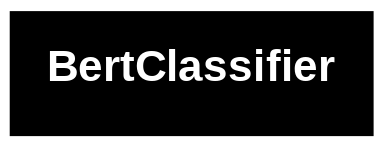

In [15]:
bert_encoder = tfm.nlp.encoders.build_encoder(encoder_config)
bert_classifier = tfm.nlp.models.BertClassifier(network=bert_encoder, num_classes=2)

tf.keras.utils.plot_model(bert_classifier)

In [16]:
checkpoint = tf.train.Checkpoint(encoder=bert_encoder)
checkpoint.read(
    os.path.join(folder_bert, 'bert_model.ckpt')).expect_partial().assert_existing_objects_matched()

In [12]:
# @title Download Checkpoint of the Selected Model { display-mode: "form", run: "auto" }
albert_model_display_name = 'ALBERT-base English'  # @param ['ALBERT-base English', 'ALBERT-large English', 'ALBERT-xlarge English', 'ALBERT-xxlarge English']

if albert_model_display_name == 'ALBERT-base English':
  !wget "https://storage.googleapis.com/tf_model_garden/nlp/albert/albert_base.tar.gz"
  !tar -xvf "albert_base.tar.gz"
elif albert_model_display_name == 'ALBERT-large English':
  !wget "https://storage.googleapis.com/tf_model_garden/nlp/albert/albert_large.tar.gz"
  !tar -xvf "albert_large.tar.gz"
elif albert_model_display_name == "ALBERT-xlarge English":
  !wget "https://storage.googleapis.com/tf_model_garden/nlp/albert/albert_xlarge.tar.gz"
  !tar -xvf "albert_xlarge.tar.gz"
elif albert_model_display_name == "ALBERT-xxlarge English":
  !wget "https://storage.googleapis.com/tf_model_garden/nlp/albert/albert_xxlarge.tar.gz"
  !tar -xvf "albert_xxlarge.tar.gz"

--2024-09-11 16:40:22--  https://storage.googleapis.com/tf_model_garden/nlp/albert/albert_xxlarge.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.207, 142.250.99.207, 74.125.20.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 826059238 (788M) [application/octet-stream]
Saving to: ‘albert_xxlarge.tar.gz’

albert_xxlarge.tar. 100%[===================>] 787.79M  44.4MB/s    in 15s     

2024-09-11 16:40:38 (51.6 MB/s) - ‘albert_xxlarge.tar.gz’ saved [826059238/826059238]

albert_xxlarge/
albert_xxlarge/bert_model.ckpt.index
albert_xxlarge/30k-clean.model
albert_xxlarge/30k-clean.vocab
albert_xxlarge/bert_model.ckpt.data-00000-of-00001
albert_xxlarge/params.yaml
albert_xxlarge/albert_config.json


In [13]:
# Lookup table of the directory name corresponding to each model checkpoint
folder_albert_dict = {
    'ALBERT-base English': 'albert_base',
    'ALBERT-large English': 'albert_large',
    'ALBERT-xlarge English': 'albert_xlarge',
    'ALBERT-xxlarge English': 'albert_xxlarge'
}

folder_albert = folder_albert_dict.get(albert_model_display_name)
folder_albert

'albert_xxlarge'

In [14]:
config_file = os.path.join(folder_albert, "params.yaml")
config_dict = yaml.safe_load(tf.io.gfile.GFile(config_file).read())
config_dict

{'task': {'model': {'encoder': {'albert': {'attention_dropout_rate': 0.0,
     'dropout_rate': 0.0,
     'embedding_width': 128,
     'hidden_activation': 'gelu',
     'hidden_size': 4096,
     'initializer_range': 0.02,
     'intermediate_size': 16384,
     'max_position_embeddings': 512,
     'num_attention_heads': 64,
     'num_layers': 12,
     'type_vocab_size': 2,
     'vocab_size': 30000},
    'type': 'albert'}}}}

In [17]:
# Method 1: pass encoder config dict into EncoderConfig
encoder_config = tfm.nlp.encoders.EncoderConfig(config_dict["task"]["model"]["encoder"])
encoder_config.get().as_dict()

{'vocab_size': 30000,
 'embedding_width': 128,
 'hidden_size': 4096,
 'num_layers': 12,
 'num_attention_heads': 64,
 'hidden_activation': 'gelu',
 'intermediate_size': 16384,
 'dropout_rate': 0.0,
 'attention_dropout_rate': 0.0,
 'max_position_embeddings': 512,
 'type_vocab_size': 2,
 'initializer_range': 0.02}

In [18]:
# Method 2: use override_params_dict function to override default Encoder params
encoder_config = tfm.nlp.encoders.EncoderConfig()
tfm.hyperparams.override_params_dict(encoder_config, config_dict["task"]["model"]["encoder"], is_strict=True)
encoder_config.get().as_dict()

{'vocab_size': 30000,
 'embedding_width': 128,
 'hidden_size': 4096,
 'num_layers': 12,
 'num_attention_heads': 64,
 'hidden_activation': 'gelu',
 'intermediate_size': 16384,
 'dropout_rate': 0.0,
 'attention_dropout_rate': 0.0,
 'max_position_embeddings': 512,
 'type_vocab_size': 2,
 'initializer_range': 0.02}

In [19]:
albert_config_file = os.path.join(folder_albert, "albert_config.json")
config_dict = json.loads(tf.io.gfile.GFile(albert_config_file).read())
config_dict

{'hidden_size': 4096,
 'initializer_range': 0.02,
 'intermediate_size': 16384,
 'max_position_embeddings': 512,
 'num_attention_heads': 64,
 'type_vocab_size': 2,
 'vocab_size': 30000,
 'embedding_width': 128,
 'attention_dropout_rate': 0.0,
 'dropout_rate': 0.0,
 'num_layers': 12,
 'hidden_activation': 'gelu'}

In [20]:
encoder_config = tfm.nlp.encoders.EncoderConfig({
    'type':'albert',
    'albert': config_dict
})

encoder_config.get().as_dict()

{'vocab_size': 30000,
 'embedding_width': 128,
 'hidden_size': 4096,
 'num_layers': 12,
 'num_attention_heads': 64,
 'hidden_activation': 'gelu',
 'intermediate_size': 16384,
 'dropout_rate': 0.0,
 'attention_dropout_rate': 0.0,
 'max_position_embeddings': 512,
 'type_vocab_size': 2,
 'initializer_range': 0.02}

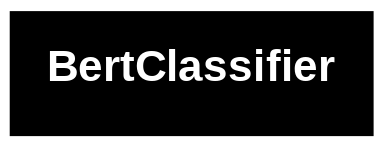

In [21]:
albert_encoder = tfm.nlp.encoders.build_encoder(encoder_config)
albert_classifier = tfm.nlp.models.BertClassifier(network=albert_encoder, num_classes=2)

tf.keras.utils.plot_model(albert_classifier)

In [22]:
checkpoint = tf.train.Checkpoint(encoder=albert_encoder)
checkpoint.read(
    os.path.join(folder_albert, 'bert_model.ckpt')).expect_partial().assert_existing_objects_matched()

In [23]:
# @title Download Checkpoint of the Selected Model { display-mode: "form", run: "auto" }
electra_model_display_name = 'ELECTRA-small English'  # @param ['ELECTRA-small English', 'ELECTRA-base English']

if electra_model_display_name == 'ELECTRA-small English':
  !wget "https://storage.googleapis.com/tf_model_garden/nlp/electra/small.tar.gz"
  !tar -xvf "small.tar.gz"
elif electra_model_display_name == 'ELECTRA-base English':
  !wget "https://storage.googleapis.com/tf_model_garden/nlp/electra/base.tar.gz"
  !tar -xvf "base.tar.gz"

--2024-09-11 16:41:55--  https://storage.googleapis.com/tf_model_garden/nlp/electra/small.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.207, 172.253.117.207, 142.250.99.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 157951922 (151M) [application/octet-stream]
Saving to: ‘small.tar.gz’

small.tar.gz        100%[===================>] 150.63M  72.7MB/s    in 2.1s    

2024-09-11 16:41:57 (72.7 MB/s) - ‘small.tar.gz’ saved [157951922/157951922]

small/
small/ckpt-1000000.data-00000-of-00001
small/params.yaml
small/checkpoint
small/ckpt-1000000.index


In [24]:
# Lookup table of the directory name corresponding to each model checkpoint
folder_electra_dict = {
    'ELECTRA-small English': 'small',
    'ELECTRA-base English': 'base'
}

folder_electra = folder_electra_dict.get(electra_model_display_name)
folder_electra

'small'

In [25]:
config_file = os.path.join(folder_electra, "params.yaml")
config_dict = yaml.safe_load(tf.io.gfile.GFile(config_file).read())
config_dict

{'model': {'cls_heads': [{'activation': 'tanh',
    'cls_token_idx': 0,
    'dropout_rate': 0.1,
    'inner_dim': 64,
    'name': 'next_sentence',
    'num_classes': 2}],
  'disallow_correct': False,
  'discriminator_encoder': {'type': 'bert',
   'bert': {'attention_dropout_rate': 0.1,
    'dropout_rate': 0.1,
    'embedding_size': 128,
    'hidden_activation': 'gelu',
    'hidden_size': 256,
    'initializer_range': 0.02,
    'intermediate_size': 1024,
    'max_position_embeddings': 512,
    'num_attention_heads': 4,
    'num_layers': 12,
    'type_vocab_size': 2,
    'vocab_size': 30522}},
  'discriminator_loss_weight': 50.0,
  'generator_encoder': {'type': 'bert',
   'bert': {'attention_dropout_rate': 0.1,
    'dropout_rate': 0.1,
    'embedding_size': 128,
    'hidden_activation': 'gelu',
    'hidden_size': 64,
    'initializer_range': 0.02,
    'intermediate_size': 256,
    'max_position_embeddings': 512,
    'num_attention_heads': 1,
    'num_layers': 12,
    'type_vocab_size': 2

In [26]:
disc_encoder_config = tfm.nlp.encoders.EncoderConfig(
    config_dict['model']['discriminator_encoder']
)

disc_encoder_config.get().as_dict()

{'vocab_size': 30522,
 'hidden_size': 256,
 'num_layers': 12,
 'num_attention_heads': 4,
 'hidden_activation': 'gelu',
 'intermediate_size': 1024,
 'dropout_rate': 0.1,
 'attention_dropout_rate': 0.1,
 'max_position_embeddings': 512,
 'type_vocab_size': 2,
 'initializer_range': 0.02,
 'embedding_size': 128,
 'output_range': None,
 'return_all_encoder_outputs': False,
 'return_attention_scores': False,
 'return_word_embeddings': False,
 'norm_first': False}

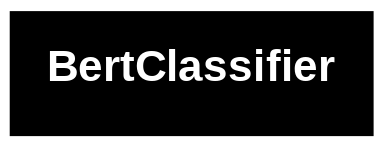

In [27]:
disc_encoder = tfm.nlp.encoders.build_encoder(disc_encoder_config)
elctra_dic_classifier = tfm.nlp.models.BertClassifier(network=disc_encoder, num_classes=2)
tf.keras.utils.plot_model(elctra_dic_classifier)

In [28]:
checkpoint = tf.train.Checkpoint(encoder=disc_encoder)
checkpoint.read(
    tf.train.latest_checkpoint(os.path.join(folder_electra))
    ).expect_partial().assert_existing_objects_matched()